In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
x=np.linspace(0,50,501)
x


array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [5]:
y = np.sin(x)
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

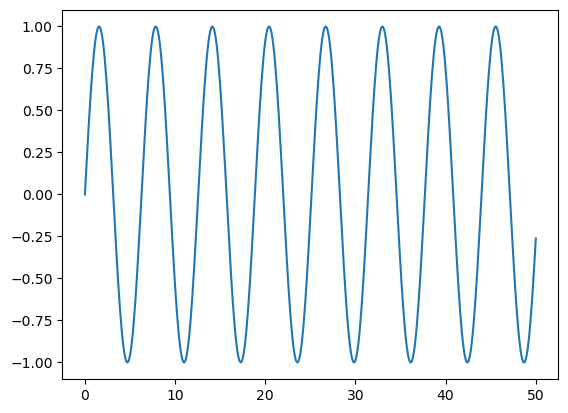

In [6]:
plt.plot(x,y)

In [7]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [8]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [9]:
len(df)

501

In [11]:
test_percent = 0.1 #10% of the data

In [12]:
test_point = np.round(len(df)*test_percent)

In [13]:
test_index = int(len(df) - test_point)
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(train)

MinMaxScaler()

In [17]:
scaled_train = scaler.transform(train)

scaled_test = scaler.transform(test)

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 

In [24]:
length = 25 #length of the output
batch_size = 1 #1 batch size

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size) #generator for the training data
'''data: This parameter represents the input data for the generator. It is expected to contain 
the preprocessed and scaled training data for the RNN.

targets: This parameter specifies the target data for the generator. It is also set to the scaled_train data, 
indicating that the RNN will be trained to predict the next time step based on the current sequence.'''

Input Data Preparation: You provide the TimeSeriesGenerator with your input data, which is typically a time series, meaning data points collected over time. This could be stock prices, sensor readings, or any other sequential data.

Target Data Preparation: You also provide the TimeSeriesGenerator with the corresponding target data. For time-series forecasting tasks, this is often the next data point in the sequence after the input data. For example, if your input data consists of the temperature readings for the past 24 hours, the target data would be the temperature reading for the next hour.

In [28]:
X,y = generator[0]
X,y

(array([[[0.49999912],
         [0.54991622],
         [0.59933458],
         [0.64776041],
         [0.69470985],
         [0.73971381],
         [0.78232262],
         [0.82211054],
         [0.85868004],
         [0.89166571],
         [0.92073798],
         [0.94560637],
         [0.9660224 ],
         [0.98178208],
         [0.99272794],
         [0.99875061],
         [0.99978993],
         [0.9958355 ],
         [0.98692684],
         [0.97315296],
         [0.95465148],
         [0.93160726],
         [0.90425056],
         [0.87285471],
         [0.83773342]]]),
 array([[0.79923759]]))

In [29]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [31]:
n_features = 1

In [34]:
model = Sequential()
model.add(SimpleRNN(50, input_shape = (length, n_features)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.fit_generator(generator, epochs=5)

Epoch 1/5


/var/folders/7v/9x6ygmhs4n7dwfpt5qfj0_6m0000gn/T/ipykernel_3600/3367823435.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=5)


401/401 [==============================] - 1s 2ms/step - loss: 0.0280
Epoch 2/5
401/401 [==============================] - 1s 2ms/step - loss: 5.0955e-04
Epoch 3/5
401/401 [==============================] - 1s 2ms/step - loss: 1.7967e-04
Epoch 4/5
401/401 [==============================] - 1s 2ms/step - loss: 9.0199e-05
Epoch 5/5
401/401 [==============================] - 1s 2ms/step - loss: 3.5978e-04


In [37]:
losses = pd.DataFrame(model.history.history)

<Axes: >

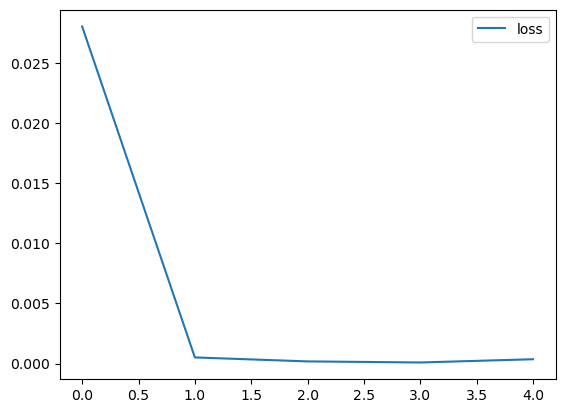

In [38]:
losses.plot()

1/1 [==============================] - 0s 9ms/step


/var/folders/7v/9x6ygmhs4n7dwfpt5qfj0_6m0000gn/T/ipykernel_3600/1342584659.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: >

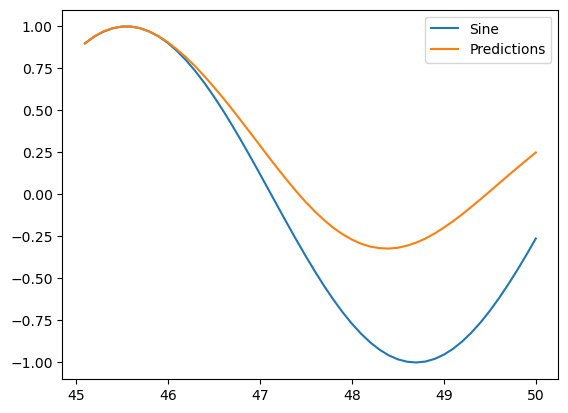

In [39]:
first_eval_batch = scaled_train[-length:]
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

model.predict(first_eval_batch)

scaled_test[0]

test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.plot()


In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [42]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20


/var/folders/7v/9x6ygmhs4n7dwfpt5qfj0_6m0000gn/T/ipykernel_3600/945105415.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])


402/402 [==============================] - 3s 4ms/step - loss: 0.0152 - val_loss: 1.4320e-04
Epoch 2/20
402/402 [==============================] - 1s 4ms/step - loss: 1.8651e-04 - val_loss: 3.0185e-05
Epoch 3/20
402/402 [==============================] - 1s 4ms/step - loss: 4.3681e-04 - val_loss: 1.3189e-05
Epoch 4/20
402/402 [==============================] - 1s 4ms/step - loss: 7.0410e-05 - val_loss: 6.3443e-05
Epoch 5/20
402/402 [==============================] - 1s 4ms/step - loss: 1.8098e-04 - val_loss: 4.3903e-04


1/1 [==============================] - 0s 8ms/step


/var/folders/7v/9x6ygmhs4n7dwfpt5qfj0_6m0000gn/T/ipykernel_3600/3990020304.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: >

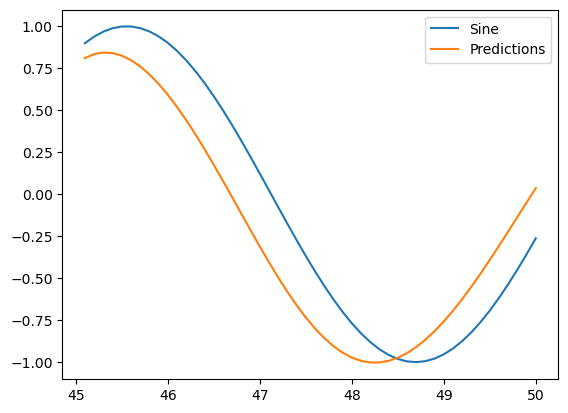

In [43]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.plot()


In [46]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [47]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [48]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6


/var/folders/7v/9x6ygmhs4n7dwfpt5qfj0_6m0000gn/T/ipykernel_3600/2968077443.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=6)


451/451 [==============================] - 3s 4ms/step - loss: 0.0181
Epoch 2/6
451/451 [==============================] - 2s 4ms/step - loss: 3.0454e-05
Epoch 3/6
451/451 [==============================] - 2s 4ms/step - loss: 4.9949e-05
Epoch 4/6
451/451 [==============================] - 2s 4ms/step - loss: 6.6381e-05
Epoch 5/6
451/451 [==============================] - 2s 4ms/step - loss: 5.7925e-04
Epoch 6/6
451/451 [==============================] - 2s 4ms/step - loss: 2.2194e-05


In [49]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 9ms/step


In [58]:
forecast = scaler.inverse_transform(forecast)

In [59]:
# forecast

In [60]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [61]:
len(forecast)

50

In [62]:
50*0.1

5.0

In [63]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [64]:
len(forecast_index)

50

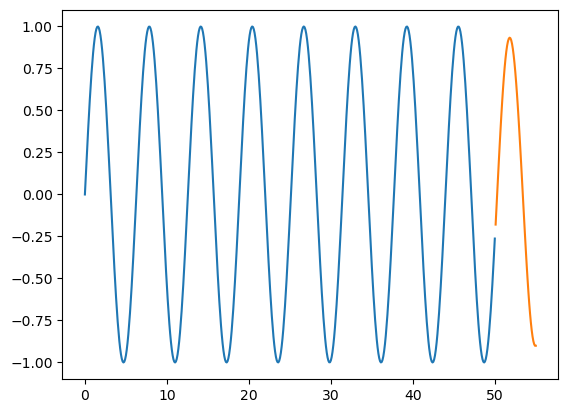

In [57]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)